## Objetivo do projeto

Dataset original do Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci). O objetivo é encontrar a presença de uma doença coronária em pacientes dadas 13 variáveis através de técnicas de classificação.
Neste projeto, o principal foco será conseguir um modelo que preveja com pelo menos 95% de acurácia a presença da doença. 

Desafios principais:
* Conseguir atingir uma acurácia alta com dataset limitado
* Decidir quais variáveis possuem maior influência sem conhecimento médico
* Estabelecer relações entre variáveis

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

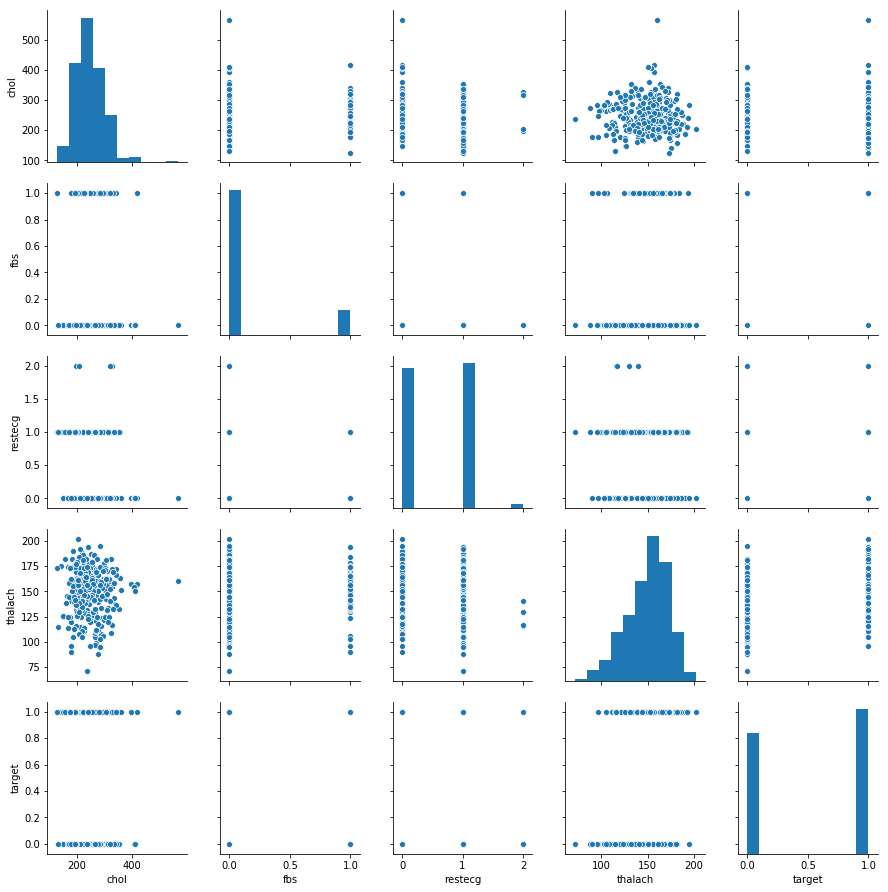

In [6]:
sns.pairplot(df[['chol','fbs','restecg','thalach','target']])

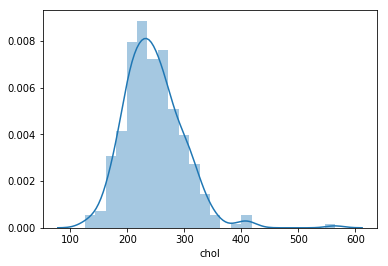

In [7]:
sns.distplot(df['chol'])

In [8]:
df['chol_log'] = np.log(df['chol']+1.0)

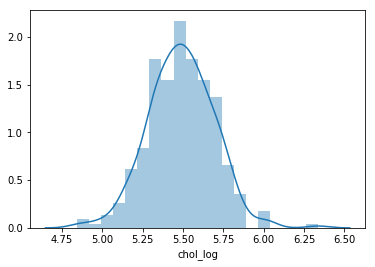

In [9]:
sns.distplot(df['chol_log'])

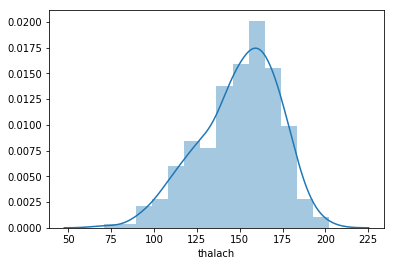

In [10]:
sns.distplot(df['thalach'])

In [11]:
df['thalach_log'] = np.log(df['thalach']+1.0)

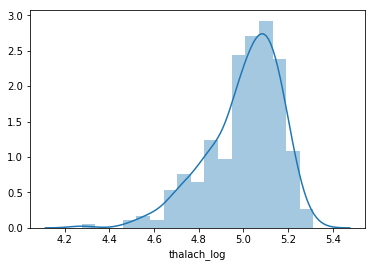

In [12]:
sns.distplot(df['thalach_log'])

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_log,thalach_log
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,5.455321,5.017280
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,5.525453,5.236442
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,5.323010,5.153292
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,5.468060,5.187386
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,5.872118,5.099866


In [14]:
X = df.drop(df[['thalach_log','target','chol_log']], axis='columns')
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [15]:
y = df['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
import statsmodels.api as sm 

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=5)

X_train_const = sm.add_constant(X_train)
modelo_stats = sm.OLS(y_train, X_train, hasconst=True).fit()
modelo_stats.summary()

/home/murilomen/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     19.76
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           8.18e-30
Time:                        17:03:30   Log-Likelihood:                -98.060
No. Observations:                 257   AIC:                             222.1
Df Residuals:                     244   BIC:                             268.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0043      0.003      1.677      0.095      -0.001       0.009
sex           -0.1963      0.052     -3.801      0.000      -0.298      -0.095
cp             0.0958      0.025      3.851      0.000       0.047       0.145
trestbps      -0.0009      0.001     -0.671      0.503      -0.003       0.002
chol          -0.0003      0.000     -0.581      0.562      -0.001       0.001
fbs            0.0036      0.065      0.056      0.956      -0.125       0.132
restecg        0.0730      0.044      1.645      0.101      -0.014       0.160
thalach        0.0054      0.001      5.387      0.000       0.003       0.007
exang         -0.1463      0.058     -2.524      0.012      -0.260      -0.032
oldpeak       -0.0551      0.026     -2.153      0.032      -0.106      -0.005
slope          0.0755      0.048      1.561      0.120      -0.020       0.171
ca            -0.0977      0.025     -3.945      0.000      -0.146      -0.049
thal          -0.1105      0.039     -2.811      0.005      -0.188      -0.033
==============================================================================
Omnibus:                        7.819   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                8.077
Skew:                          -0.416   Prob(JB):                       0.0176
Kurtosis:                       2.751   Cond. No.                         947.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
X = X.drop(X[['age']], axis='columns')
X.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,3,145,233,1,0,150,0,2.3,0,0,1
1,1,2,130,250,0,1,187,0,3.5,0,0,2
2,0,1,130,204,0,0,172,0,1.4,2,0,2
3,1,1,120,236,0,1,178,0,0.8,2,0,2
4,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=5)
X_train_const = sm.add_constant(X_train)
modelo_stats = sm.OLS(y_train, X_train, hasconst=True).fit()
modelo_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     21.15
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           6.60e-30
Time:                        17:03:30   Log-Likelihood:                -99.532
No. Observations:                 257   AIC:                             223.1
Df Residuals:                     245   BIC:                             265.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -0.1975      0.052     -3.809      0.000      -0.300      -0.095
cp             0.0983      0.025      3.944      0.000       0.049       0.147
trestbps       0.0003      0.001      0.229      0.819      -0.002       0.002
chol       -3.973e-05      0.000     -0.089      0.929      -0.001       0.001
fbs            0.0051      0.065      0.078      0.938      -0.123       0.134
restecg        0.0789      0.044      1.775      0.077      -0.009       0.166
thalach        0.0053      0.001      5.266      0.000       0.003       0.007
exang         -0.1431      0.058     -2.461      0.015      -0.258      -0.029
oldpeak       -0.0520      0.026     -2.030      0.043      -0.103      -0.002
slope          0.0806      0.048      1.665      0.097      -0.015       0.176
ca            -0.0905      0.024     -3.697      0.000      -0.139      -0.042
thal          -0.1014      0.039     -2.594      0.010      -0.178      -0.024
==============================================================================
Omnibus:                        5.996   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                6.113
Skew:                          -0.356   Prob(JB):                       0.0471
Kurtosis:                       2.748   Cond. No.                         933.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
modelo = MultinomialNB()

In [23]:
modelo.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
y_predict = modelo.predict(X_test)

In [25]:
'A eficiencia do modelo é de: '+ str(np.round((len(y_test)-sum(np.abs(y_test - y_predict)))/len(y_test) * 100, 2)) + '%'

'A eficiencia do modelo é de: 82.61%'

In [26]:
from sklearn.ensemble import AdaBoostClassifier
modelo2 = AdaBoostClassifier()

In [27]:
modelo2.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [28]:
y_predict2 = modelo2.predict(X_test)

In [29]:
'A eficiencia do modelo é: '+ str(np.round((len(y_test)-sum(np.abs(y_test - y_predict2)))/len(y_test) * 100, 2)) + '%'

'A eficiencia do modelo é: 78.26%'

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
cm = confusion_matrix(y_test,y_predict) # NB
cm2 = confusion_matrix(y_test,y_predict2) # Adaboost

## Matriz de confusão

É interessante observar a matriz de confusão para se ter uma ideia da proporção do teste que ficou como falso negativo, que no caso de doenças, é o fator agravante para o modelo.

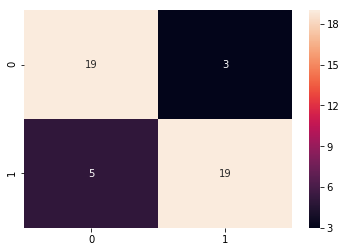

In [32]:
sns.heatmap(cm, annot=True)

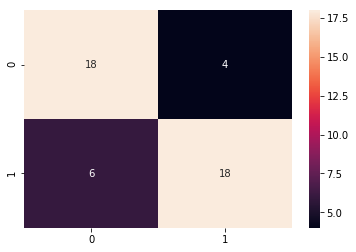

In [33]:
sns.heatmap(cm2, annot=True)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
acc1 = accuracy_score(y_test,y_predict)
acc2 = accuracy_score(y_test,y_predict2)

In [36]:
'A acurácia do NB é de ' + str(np.round(acc1*100,2)) + '%'

'A acurácia do NB é de 82.61%'

In [37]:
'A acurácia do AdaBoost é de ' + str(np.round(acc2*100,2)) + '%'

'A acurácia do AdaBoost é de 78.26%'

## Regressão logística

Neste ponto, é interessante de se analisar o comportamento das variáveis contínuas com o nosso valor target para identificar se elas se comportam de modo que a regressão logística seja mais eficiente. Como será identificado nos gráficos plotados, é bastante difícil de dizer que elas possuem essa relação.

In [38]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'chol_log',
       'thalach_log'],
      dtype='object')

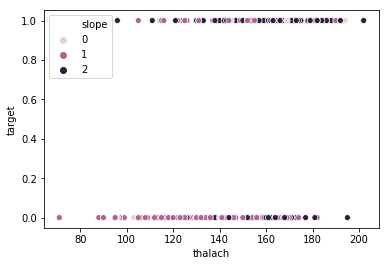

In [39]:
sns.scatterplot(x='thalach',y='target', hue='slope', data=df)

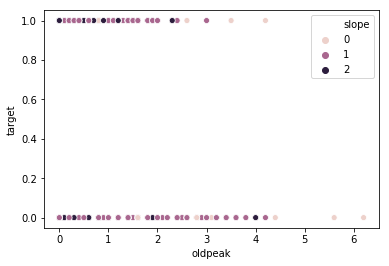

In [40]:
sns.scatterplot(x='oldpeak',y='target',hue='slope', data=df)

In [41]:
X = df[['sex','cp','thalach','exang','oldpeak','ca','thal','chol']]
y = df['target']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=5)

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [44]:
from sklearn.tree import export_graphviz
export_graphviz(tree_clf,
                out_file="heart_clf.dot",
                rounded=True,
                filled=True)

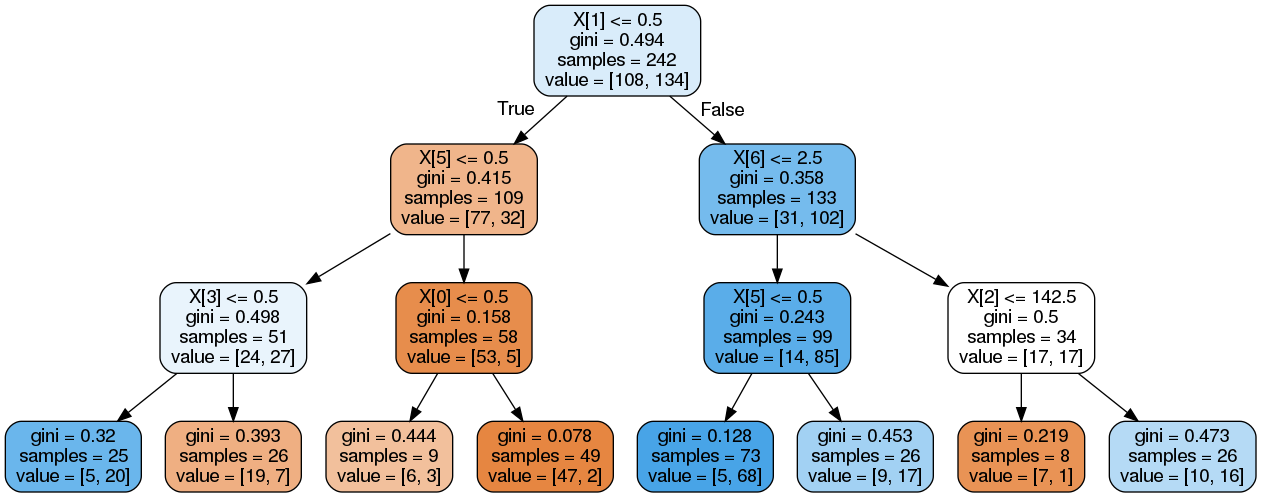

In [45]:
y_predict_t = tree_clf.predict(X_test)

In [46]:
acc_t = accuracy_score(y_test, y_predict_t)

In [47]:
'A acurácia do DecisionTree é de ' + str(np.round(acc_t*100,2)) + '%'

'A acurácia do DecisionTree é de 86.89%'

Uma das formas de fazer o modelo performar melhor é aumentando a profundidade de parada da construção da árvore. Sendo assim, é feito um estudo rápido e recursivo até que o modelo atinja a melhor performance. Com a profundidade de 4 atinge-se o melhor resultado, como mostra o programa abaixo.

In [48]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train,y_train)
y_predict_t = tree_clf.predict(X_test)
acc_t = accuracy_score(y_test, y_predict_t)
'A acurácia do DecisionTree é de ' + str(np.round(acc_t*100,2)) + '%'

'A acurácia do DecisionTree é de 93.44%'

## XG Boost

Como ainda não foi possível atingir um modelo com >95% de acerto, talvez a solução venha pela escolha de um modelo de classificação mais robusto. Para isso, vamos agora analisar o XG Boost Classifier, que é um classificador baseado na biblioteca de mesmo nome. O princípio que rege esse modelo é o do gradiente descendente. 

In [49]:
from xgboost import XGBClassifier

In [50]:
modelo3 = XGBClassifier()

In [51]:
X = df[['sex','cp','thalach','exang','oldpeak','ca','thal','chol']]
y = df['target']

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=5)

In [53]:
modelo3.fit(X_train,y_train)
y_predict3 = modelo3.predict(X_test,ntree_limit=6)

In [54]:
acc3 = accuracy_score(y_test,y_predict3)

In [55]:
'A acurácia do XGBoost é de ' + str(np.round(acc3*100,2)) + '%'

'A acurácia do XGBoost é de 88.52%'

## Gradient Boost - SK Learn

Testando agora com o módulo sklearn, para saber qual dos três modelos será o de melhor desemepenho.

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
modelo4 = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100)

In [57]:
X = df[['sex','cp','thalach','exang','oldpeak','ca','thal','chol']]
y = df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=5)

In [58]:
modelo4.fit(X_train,y_train)
y_predict4 = modelo4.predict(X_test)

In [59]:
acc4 = accuracy_score(y_test,y_predict4)
'A acurácia do GradientBoost é de ' + str(np.round(acc3*100,2)) + '%'

'A acurácia do GradientBoost é de 88.52%'

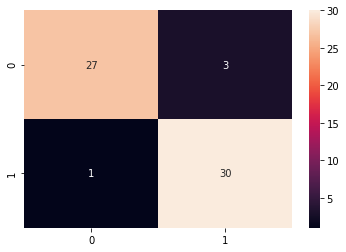

In [60]:
sns.heatmap(confusion_matrix(y_test,y_predict_t), annot=True) # Árvore de Decisão

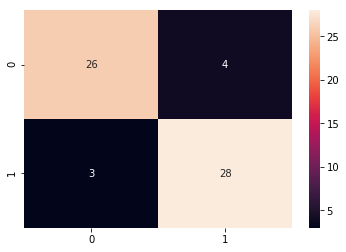

In [61]:
sns.heatmap(confusion_matrix(y_test,y_predict3), annot=True) # XG Boost

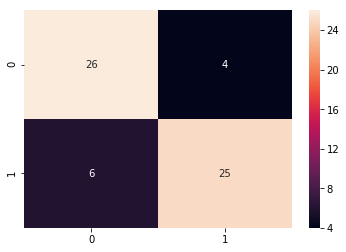

In [62]:
sns.heatmap(confusion_matrix(y_test,y_predict4), annot=True) # Gradient Boost SKlearn

Por enquanto, como o Decision Tree foi o modelo com maior desempenho e menor número de falsos negativos, ele será o modelo utilizado. É necessário algum tratamento das variáveis para que se atinja a meta de 95%.

## Dummificar variáveis

Uma das hipóteses é que as variáveis categóricas não necessariamente representem uma relação crescente ou decrescente com o valor target. O próximo passo é, então, "dummificar" para poder ter um maior número de variáveis disponível para treinar o modelo.

In [68]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
dt = pd.get_dummies(df, drop_first=True)

In [71]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
df['cp']=df['cp'].astype('object')
df['slope']=df['slope'].astype('object')
df['thal']=df['thal'].astype('object')
df['restecg']=df['restecg'].astype('object')


In [91]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [92]:
df = pd.get_dummies(df, drop_first=True)

In [93]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,1,0,0,1,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,0,0,0,1,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,1,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,0,1,0,0,1,0,1,0


In [113]:
X = df.drop(['target'],axis='columns')
y = df['target']

In [119]:
X.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,0,1,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,0,0,0,0,0,1,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,0,0,1,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,0,0,0,0,1,0,0,1,0,1,0


In [120]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=5)

In [121]:
tree_clf.fit(X_train,y_train)
y_predict_t2 = tree_clf.predict(X_test)
acc_t2 = accuracy_score(y_test, y_predict_t2)
'A acurácia do DecisionTree é de ' + str(np.round(acc_t*100,2)) + '%'

'A acurácia do DecisionTree é de 93.44%'

In [123]:
modelo4.fit(X_train,y_train)
y_predict_t3 = modelo4.predict(X_test)
acc_t3 = accuracy_score(y_test, y_predict_t3)
'A acurácia do Modelo 4 é de ' + str(np.round(acc_t*100,2)) + '%'

'A acurácia do Modelo 4 é de 93.44%'

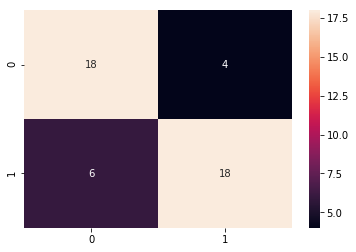

In [105]:
cm_t2 = confusion_matrix(y_test,y_predict_t2)
sns.heatmap(cm_t2, annot=True)

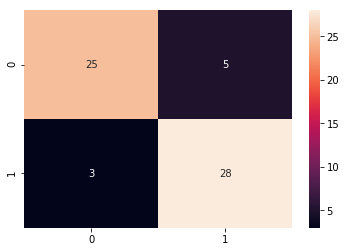

In [124]:
cm_4 = confusion_matrix(y_test,y_predict_t3)
sns.heatmap(cm_4, annot=True)

In [125]:
export_graphviz(tree_clf,
                out_file="heart_clf.dot",
                rounded=True,
                filled=True)

In [126]:
! dot -Tpng heart_clf.dot -o heart_clf.png